In [1]:
import pandas as pd
import numpy as np

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
import random

np.random.seed(42)
random.seed(42)


In [5]:
train['전화해지여부'].value_counts()

0    26882
1     3318
Name: 전화해지여부, dtype: int64

In [6]:
train

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


In [7]:
test

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
0,TEST_00000,110,0,210.7,142,35.6,205.9,93,17.43,120.9,111,5.37,2
1,TEST_00001,283,1,268.5,100,30.3,283.0,92,28.32,290.0,89,8.82,0
2,TEST_00002,34,1,243.3,205,21.3,225.7,205,29.00,92.6,29,2.44,2
3,TEST_00003,209,86,83.0,93,24.1,270.6,220,22.89,266.9,81,2.80,6
4,TEST_00004,202,0,293.2,23,31.0,294.0,24,26.39,223.8,33,6.66,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12938,TEST_12938,322,1,282.4,202,89.9,270.2,321,32.80,293.6,321,8.88,2
12939,TEST_12939,222,0,233.5,209,34.6,234.0,92,23.22,224.4,202,9.63,2
12940,TEST_12940,98,29,223.4,209,29.3,223.9,203,28.82,230.0,208,22.26,2
12941,TEST_12941,23,30,241.3,222,24.7,234.3,93,22.23,223.1,33,9.93,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


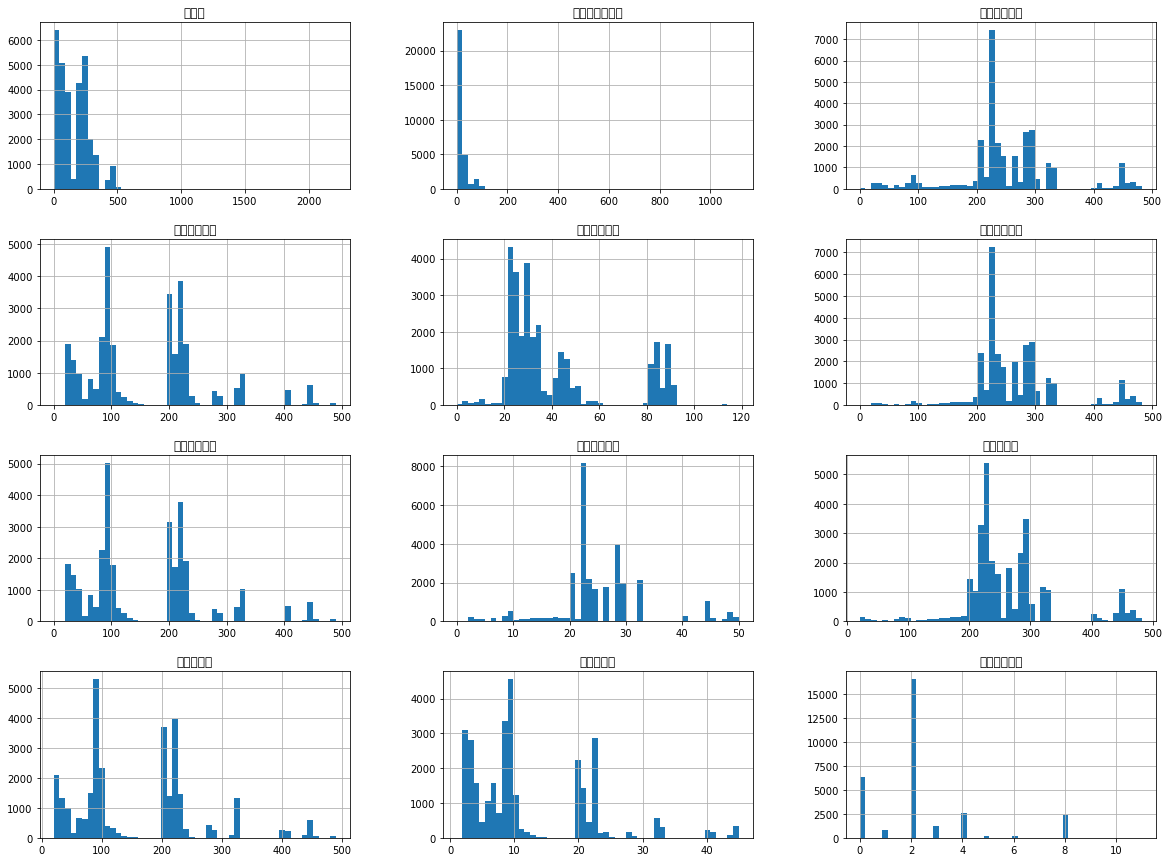

In [9]:
import matplotlib.pyplot as plt

train.drop(['ID','전화해지여부'], axis=1).hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
X=train.drop(['ID','전화해지여부'], axis=1)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF calculation
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # Filling the 'VIF Factor' column of the dataframe with the VIF value for each feature of the dataset
vif["features"] = X.columns

# Printing the VIF dataframe
print(vif)


    VIF Factor features
0     2.906115      가입일
1     1.247456  음성사서함이용
2    15.226688   주간통화시간
3     3.839621   주간통화횟수
4     4.647433   주간통화요금
5    41.191943   저녁통화시간
6     3.817328   저녁통화횟수
7    32.596202   저녁통화요금
8    25.077348    밤통화시간
9     3.794754    밤통화횟수
10    2.922198    밤통화요금
11    2.360845   상담전화건수


In [12]:
from sklearn.decomposition import PCA

# Creating an instance of the 'PCA' class with the number of components to be 2
pca = PCA(n_components=2)

# Performing PCA on the dataset
pca.fit(X)

# Transforming the dataset with the PCA
X_pca = pca.transform(X)
variance_ratio = pca.explained_variance_ratio_ # Calculating the variance ratio of the principal components
print(variance_ratio)

# Given the low explanatory power of the two principal components, it can be inferred that all variables have similar explanatory power

[0.33451546 0.1893115 ]


In [13]:
# Calculating the proportion of phone churn in the entire dataset
positive_count = train['전화해지여부'].sum()
negative_count = train.shape[0] - positive_count
scale_pos_weight = negative_count / positive_count

In [14]:
scale_pos_weight

8.101868595539482

In [15]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X=train.drop(['ID', '전화해지여부'], axis = 1)
y=train['전화해지여부']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# LGBM Model definition
model = LGBMClassifier(n_estimators=1000, max_depth=7, learning_rate=0.05, objective='binary', scale_pos_weight=scale_pos_weight)

# Model training
model.fit(X_train, y_train)

# Making predictions with the model on the validation dataset
y_pred = model.predict(X_val)

# Model evaluation
print("F1-score: ", f1_score(y_val, y_pred, average='macro'))


F1-score:  0.7982533833716602


In [16]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a LGBMClassifier model object
model = LGBMClassifier()

# Hyperparameters to explore
param_grid = {
    'n_estimators': [100, 500, 1000], # Number of decision trees
    'max_depth': [5, 10, 15], # Maximum depth of the tree
    'learning_rate': [0.01, 0.1, 1], # Learning rate
}

# Creating a GridSearchCV model object
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_macro', # Evaluation metric: Macro F1 Score
                          cv=5, # 5-fold cross validation 
                          n_jobs=-1) # Using all CPU cores

# GridSearchCV training
grid_model.fit(X_train, y_train)

# Printing the optimal hyperparameters
print(grid_model.best_params_)


{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 1000}


In [17]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=train.drop(['ID', '전화해지여부'], axis = 1)
y=train['전화해지여부']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# LGBM Model definition
model = LGBMClassifier(n_estimators=1000, max_depth=10, learning_rate=0.1, objective='binary', scale_pos_weight=scale_pos_weight)

# Model training
model.fit(X_train, y_train)

# Making predictions with the model on the validation dataset
y_pred = model.predict(X_val)

# Model evaluation
print("F1-score: ", f1_score(y_val, y_pred, average='macro'))


F1-score:  0.8051949589061849


In [18]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

X=train.drop(['ID', '전화해지여부'], axis = 1)
y=train['전화해지여부']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a CatBoost model object
model = CatBoostClassifier(iterations=1000, 
                           learning_rate=0.1,
                           depth=6,
                           loss_function='Logloss',
                           eval_metric='F1',
                           random_seed=42)

# CatBoost Model training
model.fit(X_train, y_train,
          eval_set=(X_val, y_val),
          verbose=100)

# Making predictions on the validation dataset
y_pred = model.predict(X_val)

# Calculating Macro F1 Score on the validation dataset
f1 = f1_score(y_val, y_pred, average='macro')

# print Macro F1 Score
print(f1)




0:	learn: 0.0125092	test: 0.0000000	best: 0.0000000 (0)	total: 144ms	remaining: 2m 23s
100:	learn: 0.0945326	test: 0.0672783	best: 0.0672783 (94)	total: 643ms	remaining: 5.72s
200:	learn: 0.2470171	test: 0.1114370	best: 0.1140351 (193)	total: 1.14s	remaining: 4.55s
300:	learn: 0.3791160	test: 0.1906077	best: 0.1931034 (299)	total: 1.65s	remaining: 3.83s
400:	learn: 0.5038126	test: 0.2529335	best: 0.2529335 (399)	total: 2.1s	remaining: 3.13s
500:	learn: 0.6048162	test: 0.3139679	best: 0.3139679 (498)	total: 2.52s	remaining: 2.51s
600:	learn: 0.6811663	test: 0.3677343	best: 0.3677343 (596)	total: 2.97s	remaining: 1.97s
700:	learn: 0.7298600	test: 0.3976879	best: 0.3986095 (696)	total: 3.4s	remaining: 1.45s
800:	learn: 0.7771883	test: 0.4203390	best: 0.4216460 (796)	total: 3.84s	remaining: 953ms
900:	learn: 0.8109271	test: 0.4493392	best: 0.4493392 (894)	total: 4.28s	remaining: 471ms
999:	learn: 0.8413764	test: 0.4696970	best: 0.4696970 (999)	total: 4.71s	remaining: 0us

bestTest = 0.4696

In [19]:
from imblearn.over_sampling import BorderlineSMOTE

X=train.drop(['ID', '전화해지여부'], axis = 1)
y=train['전화해지여부']

blsm = BorderlineSMOTE() # Creating an instance of the 'BorderlineSMOTE' class
X_resampled, y_resampled = blsm.fit_resample(X, y) # Performing the sampling on the feature set 'X' and target variable 'y'
# Checking the class distribution of the resampled dataset
print("샘플링 후 클래스 비율 :\n", pd.Series(y_resampled).value_counts())

# For model training, replacing the original train set with the oversampled data
X, y = X_resampled, y_resampled

샘플링 후 클래스 비율 :
 0    26882
1    26882
Name: 전화해지여부, dtype: int64


In [20]:
X

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
0,329,0,99.200000,93,27.300000,268.800000,68,28.920000,262.900000,328,32.890000,2
1,2,80,323.900000,323,83.700000,269.400000,326,32.090000,322.800000,209,32.320000,2
2,93,28,282.400000,323,34.200000,207.000000,322,32.820000,280.800000,328,8.280000,0
3,223,1,221.400000,223,25.100000,233.000000,61,23.900000,203.800000,234,9.360000,0
4,222,0,96.300000,222,28.700000,223.900000,69,28.080000,263.100000,223,2.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
53759,142,16,197.699955,131,34.477713,162.223941,91,13.662372,223.645468,100,10.051157,0
53760,223,0,227.684671,227,21.328048,224.509249,89,22.247195,219.668648,85,17.973769,6
53761,82,0,314.549936,64,67.300256,329.825629,208,28.517987,205.656759,206,9.156682,5
53762,65,1,225.131389,226,23.551188,235.527264,223,23.170854,237.602043,23,22.247511,0


In [21]:
y

0        0
1        0
2        0
3        0
4        0
        ..
53759    1
53760    1
53761    1
53762    1
53763    1
Name: 전화해지여부, Length: 53764, dtype: int64

In [22]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a LGBMClassifier model object
model = LGBMClassifier()

# Hyperparameters to explore
param_grid = {
    'n_estimators': [100, 500, 1000], # Number of decision trees
    'max_depth': [5, 10, 15], # Maximum depth of the tree
    'learning_rate': [0.01, 0.1, 1], # Learning rate
}

# Creating a GridSearchCV model object
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_macro', # Evaluation metric: Macro F1 Score
                          cv=5, # 5-fold cross validation 
                          n_jobs=-1) # Using all CPU cores

# GridSearchCV training
grid_model.fit(X_train, y_train)

# Printing the optimal hyperparameters
print(grid_model.best_params_)

{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 1000}


In [23]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# LGBM Model definition
model = LGBMClassifier(n_estimators=1000, max_depth=10, learning_rate=0.1, objective='binary')

# Model training
model.fit(X_train, y_train)

# Making predictions with the model on the validation dataset
y_pred = model.predict(X_val)

# Model evaluation
print("F1-score: ", f1_score(y_val, y_pred, average='macro'))

F1-score:  0.9636366845863673


In [24]:
model.fit(X, y)

LGBMClassifier(max_depth=10, n_estimators=1000, objective='binary')

In [25]:
test=pd.read_csv('test.csv')
test=test.drop(['ID'],axis=1)
pred = model.predict(test)
submit = pd.read_csv('sample_submission.csv')
submit['전화해지여부'] = pred

In [26]:
submit.to_csv('submit.csv', index = False)